![](../../CintillaTecNM-ITD.png)

<div style="Text-align: center">
    <h2> Análisis de datos masivos </h2>
    <h3> Árbol de decisiones </h3><br>
    <h3> Nombre docente </h3>
    <h4> Jose Gabriel Rodriguez Rivas <h4>
    <h3> Nombre Alumno </h3>
    <h4> Misael Omar Vargas Ochoa <h4>
</div>

##  Parte 1: Crear un clasificador de árbol de decisiones

#### Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic?

 ¿Cuántos menores de edad sobrevivieron?
 ¿Cuántas mujeres sobrevivieron comparado con hombres?
 ¿Cuántas personas de las diferentes clases sobrevivieron?

In [1]:
#import pandas
import pandas as pd

#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("./Data/titanic-train.csv")

In [2]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    object 
 5   Age          738 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 85.9+ KB


#### ¿Faltan valores en el conjunto de datos?
Si, ya que se encuentran los siguientes valores nulos

<table>
  <tr>
    <td>Cabina</td>
    <td>713</td>
    <td>valores nulos</td>
  </tr>
  <tr>
    <td>Edad</td>
    <td>177</td>
    <td>valores nulos</td>
  </tr>
  <tr>
    <td>Embarque</td>
    <td>1</td>
    <td>valor nulo</td>
  </tr>
<table>

In [3]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


In [4]:
# Si el parámetro toLabel es ‘male’, colocar 0; si el valor es otro, colocar 1
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [5]:
# Reemplazar estos valores de edad faltantes por el promedio de edad para todo el conjunto de datos
training["Age"].fillna(training["Age"].mean(), inplace=True)

training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.000000,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,29.970867,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.000000,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.000000,0,0,7553,9.8375,NaN,S


#### ¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?

In [6]:
training["Age"].mean()

29.970867208672082

In [7]:
# Variable que será el objetivo del modelo
y_target = training["Survived"].values

In [8]:
# Valores que será la entrada para el modelo.
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [9]:
from sklearn import tree

# Crear el objeto del clasificador del arbol de decisión clf_train.
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Entrenar el modelo usando el metodo fit().
clf_train = clf_train.fit(X_input, y_target)

In [10]:
# Evaluar el modelo
clf_train.score(X_input,y_target)

0.8163934426229508

In [11]:
clasificacion = ["No sobrevive", "Sobrevive"]

In [12]:
# Visualización del árbol
from six import StringIO
with open("./Data/titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns, class_names = clasificacion)

##### Ejecutar en la terminal de linux el siguiente comando
dot -Tpng ./Data/titanic.dot -o ./Data/titanic.png

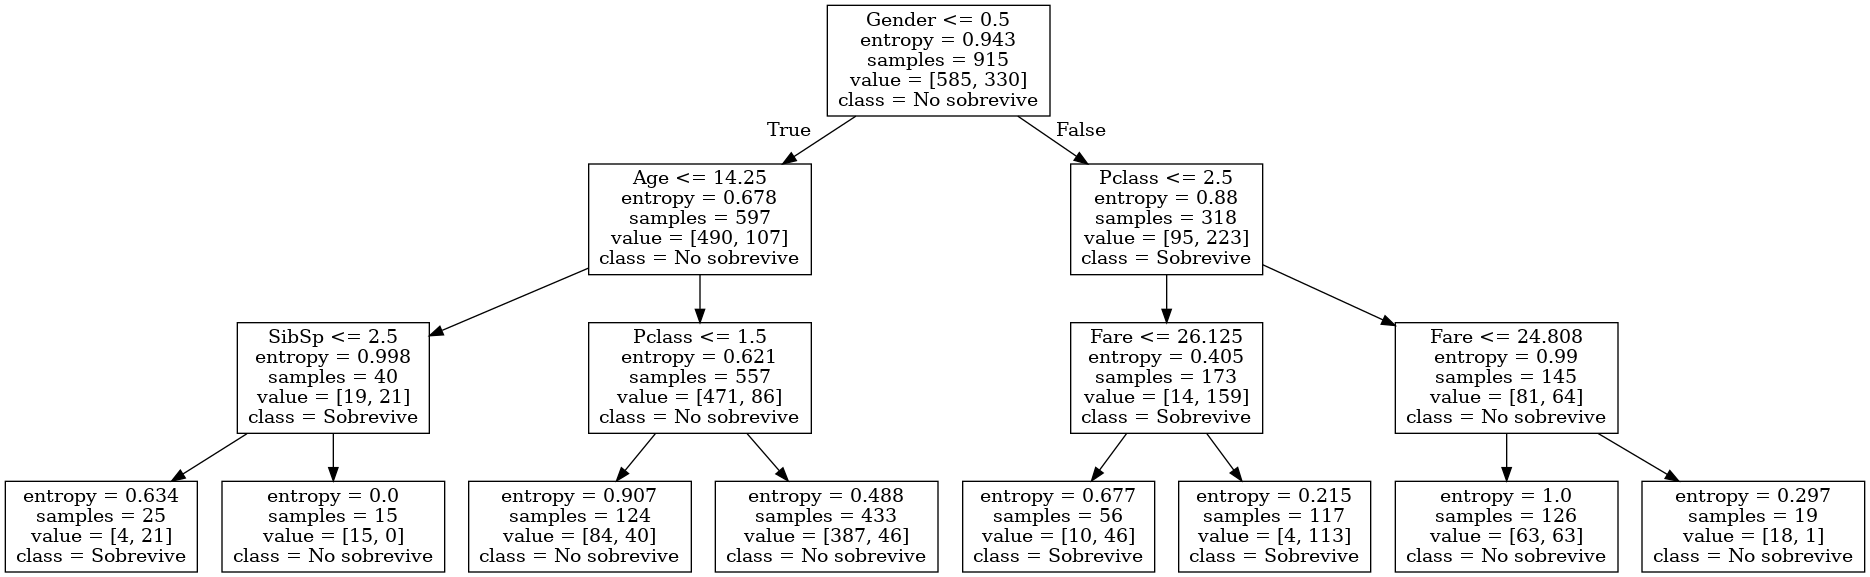

In [13]:
# Importar en modulo Image
from IPython.display import Image

# Mostrar el gráfico del árbol de decisión
Image("./Data/titanic.png")

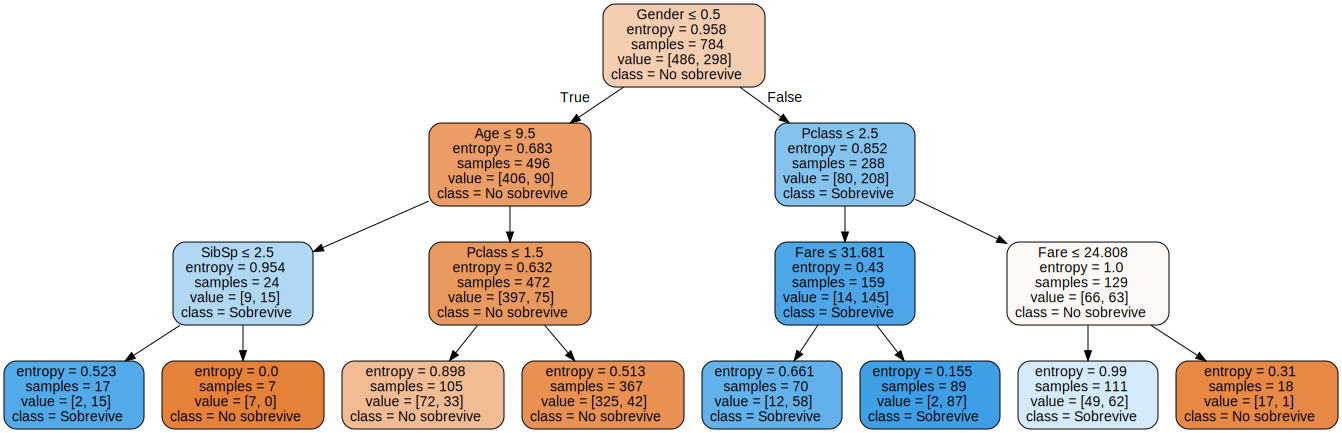

In [30]:
import graphviz
dot_data = tree.export_graphviz(clf_train, 
                                out_file=None, 
                                class_names = clasificacion, 
                                feature_names = columns, 
                                filled = True, 
                                rounded = True, 
                                special_characters = True,)

graph = graphviz.Source(dot_data)
graph.render("TITANICCOLOR", format = 'png')
graph

#### ¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales?
Fueron hombres mayores a 14 años de segunda y tercer clase con un total de 387 fallecidos.
#### ¿Qué grupo tenía la mayor cantidad de sobrevivientes?
Con 113 sobrevivientes fueron las mujeres de primera y segunda clase que pagaron una tarifa mayor a 26.125

## Parte 2: Aplicar el modelo del árbol de decisiones

In [15]:
testing = pd.read_csv("./Data/titanic-test.csv")

testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


#### ¿Cuántos registros hay en el conjunto de datos?
393
#### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?
La edad y faltan 86

In [16]:
# Remplazar la variable genero a o si es hombre y 1 a los demas valores
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [17]:
# Replazar los valores faltantes en la edad por el promedio de los demas valores
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

testing.head(10)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.00000,0,0,W./C. 14263,10.5000,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.00000,1,1,16966,134.5000,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.00000,0,0,SOTON/OQ 3101317,7.2500,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.00000,1,0,19928,90.0000,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.00000,1,0,363272,7.0000,NaN,S
5,921,0,3,"Abbott, Mr. Rossmore Edward",0,16.00000,1,1,C.A. 2673,20.2500,NaN,S
6,922,0,3,"Karlsson, Mr. Nils August",0,22.00000,0,0,350060,7.5208,NaN,S
7,923,0,3,"Connaghton, Mr. Michael",0,31.00000,0,0,335097,7.7500,NaN,Q
8,924,0,3,"Foley, Mr. William",0,29.56569,0,0,365235,7.7500,NaN,Q
9,925,0,2,"Leyson, Mr. Robert William Norman",0,24.00000,0,0,C.A. 29566,10.5000,NaN,S


In [18]:
# Variables de entrada a partir del conjunto de datos de prueba.
X_input = testing[list(columns)].values

In [19]:
# Aplique el modelo al conjunto de datos de prueba
target_labels = clf_train.predict(X_input)

# Convertir a DataFrame
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

target_labels.head()

,Est_Survival,Name
0,0,"Coleridge, Mr. Reginald Charles"
1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn..."
2,0,"Windelov, Mr. Einar"
3,1,"Minahan, Miss. Daisy E"
4,0,"Wilkes, Mrs. James (Ellen Needs)"


In [20]:
# Evalúe la precisión de las etiquetas estimadas
import numpy as np

# Cargar los datos de todos los pasageros
all_data = pd.read_csv("./Data/titanic_all.csv")

testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))

acc

0.7588832487309645

## Parte 3: Evaluar el modelo del árbol de decisiones

In [21]:
all_data = pd.read_csv("./Data/titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


#### ¿Cuántos registros hay en el conjunto de datos?

1308

#### ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan?

La edad y faltan 263

In [22]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

all_data.head(16)

,Survived,Pclass,Gender,Age,SibSp,Fare
0,1,1,1,29.000000,0,211.3375
1,1,1,0,0.916700,1,151.5500
2,0,1,1,2.000000,1,151.5500
3,0,1,0,30.000000,1,151.5500
4,0,1,1,25.000000,1,151.5500
5,1,1,0,48.000000,0,26.5500
6,1,1,1,63.000000,1,77.9583
7,0,1,0,39.000000,0,0.0000
8,1,1,1,53.000000,2,51.4792
9,0,1,0,71.000000,0,49.5042


In [23]:
from sklearn.model_selection import train_test_split

# Crear las variables de entrada y objetivo como X mayúscula y y minúscula
X = all_data[list(columns)].values
y = all_data["Survived"].values

# Generar los 4 arrays de prueba y entrenamiento con el método train_test_split().
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

In [24]:
type(X_train)

numpy.ndarray

In [25]:
# Crear el árbol de decisión de entrenamiento
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# fit el modelo de entrenamiento usando las variables de entrada y objetivo
clf_train = clf_train.fit(X_train, y_train)

In [28]:
# Evaluar el modelo en los dos datasets y almaceanarlos en variables. Convertir las evaluaciones a strings con str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

print('Puntuación del entrenamiento = '+ train_score+', Puntuación de la prueba = '+test_score)

Puntuación del entrenamiento = 0.8201530612244898, Puntuación de la prueba = 0.8053435114503816
